In [85]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/HU2.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
0,0,India,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...","Google Cloud Platform (GCP) ,","Google Cloud Compute Engine ,","Google Cloud Storage (GCS) ,","No / None,","No / None,",NaN,"No / None,","GitHub , Kaggle ,","Coursera,edX,Kaggle Learn Courses,DataCamp,Uda...","Email newsletters (Data Elixir, O'Reilly Data ..."
1,1,Indonesia,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,< 1 year,We are exploring ML methods (and may one day p...,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",None,Matplotlib,Scikit-learn,"Linear or Logistic Regression, Decision Trees ...",Build and/or run the data infrastructure that...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Kaggle Learn Courses,Cloud-certification progr...","Journal Publications (peer-reviewed journals, ..."
2,2,Pakistan,Software Engineer,1-3 years,Python,A laptop,Never,I do not use machine learning methods,I do not know,MySQL,"Basic statistical software (Microsoft Excel, G...","Python, C++, Java","PyCharm ,Jupyter Notebook, Other",Other,Matplotlib,NaN,NaN,None of these activities are an important par...,NaN,"Kaggle Notebooks,",NaN,NaN,"None,",NaN,NaN,"DataRobot,","No / None,",NaN,"No / None,","I do not share my work publicly,","DataCamp,","Kaggle (notebooks, forums, etc),YouTube (Kaggl..."
3,3,Mexico,Research Scientist,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",More than 25 times,5-10 years,I do not know,NaN,"Local development environments (RStudio, Jupyt...",Python,"Spyder,Jupyter Notebook",NVIDIA GPUs,Matplotlib,"Scikit-learn , TensorFlow ,Keras","Dense Neural Networks (MLPs, etc), Convolutio...",Do research that advances the state of the ar...,NaN,"Colab Notebooks,","General purpose image/video tools (PIL, cv2, s...","None,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,","YouTube (Kaggle YouTube, Cloud AI Adventures, ..."
4,4,India,Other,< 1 years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Never,10-20 years,We use ML methods for generating insights (but...,NaN,"Local development environments (RStudio, Jupyt...","Python, C, MATLAB","Spyder,MATLAB ,Jupyter Notebook",None,"Matplotlib ,Seaborn ,Ggplot / ggplot2","Scikit-learn ,PyTorch ,LightGBM","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Google Cloud Datalab,",NaN,NaN,"Microsoft Azure ,","Microsoft Azure Virtual Machines ,","Microsoft Azure Data Lake Storage ,","Azure Machine Learning Studio ,","No / None,",NaN,"Weights & Biases ,","I do not share my work publicly,","Kaggle Learn Courses,Udemy,","Journal Publications (peer-reviewed journals, ..."


# Q29

In [86]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,0,"Google Cloud Compute Engine ,"
1,1,NaN
2,2,NaN
3,3,NaN
4,4,"Microsoft Azure Virtual Machines ,"
...,...,...
25968,25968,"Amazon Elastic Compute Cloud (EC2) , Microsof..."
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [87]:

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [88]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,0,"[ Google Cloud Compute Engine , ]"
1,1,None
2,2,None
3,3,None
4,4,"[ Microsoft Azure Virtual Machines , ]"
...,...,...
25968,25968,"[ Amazon Elastic Compute Cloud (EC2) , Micros..."
25969,25969,None
25970,25970,None
25971,25971,None


In [89]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,Google Cloud Compute Engine
1,0,
2,1,None
3,2,None
4,3,None
...,...,...
33496,25968,
33497,25969,None
33498,25970,None
33499,25971,None


In [90]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                        6136
 Amazon Elastic Compute Cloud (EC2)     2270
 Google Cloud Compute Engine            1960
 Microsoft Azure Virtual Machines       1503
No / None                               1795
Other                                     98
dtype: int64

In [91]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,6136
1,Amazon Elastic Compute Cloud (EC2),2270
2,Google Cloud Compute Engine,1960
3,Microsoft Azure Virtual Machines,1503
4,No / None,1795
5,Other,98


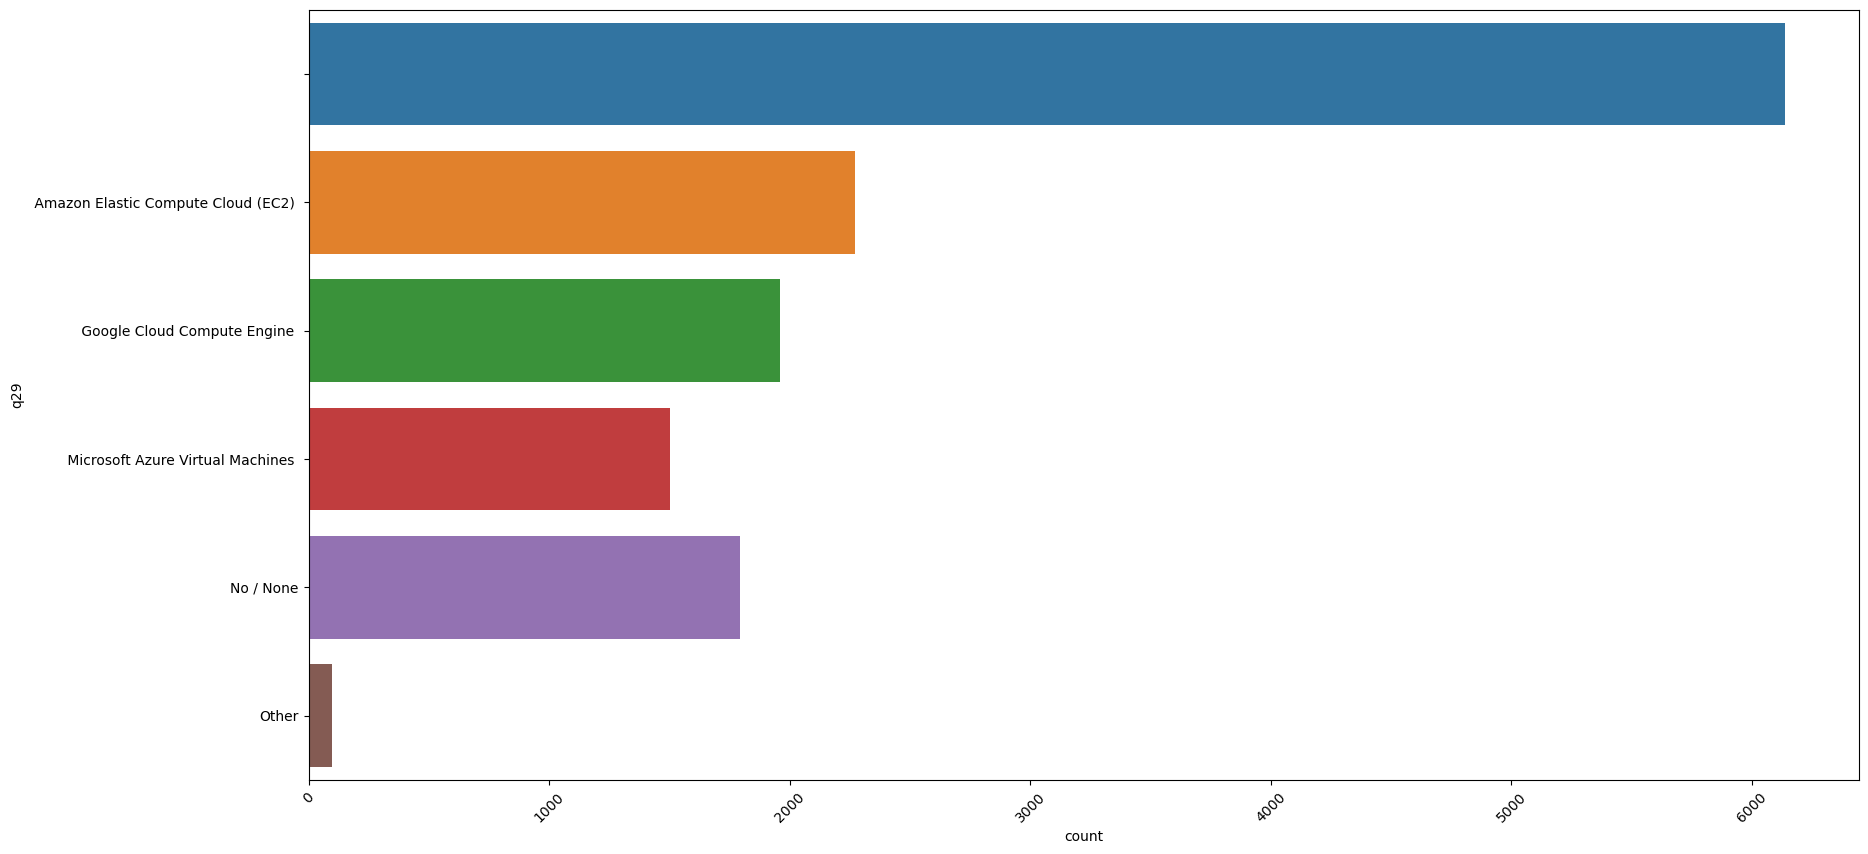

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.xticks(rotation = 45);

# Q30

In [93]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,0,"Google Cloud Storage (GCS) ,"
1,1,NaN
2,2,NaN
3,3,NaN
4,4,"Microsoft Azure Data Lake Storage ,"
...,...,...
25968,25968,"Amazon Simple Storage Service (S3) , Amazon ..."
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [94]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,0,"[Google Cloud Storage (GCS) , ]"
1,1,None
2,2,None
3,3,None
4,4,"[Microsoft Azure Data Lake Storage , ]"
...,...,...
25968,25968,"[ Amazon Simple Storage Service (S3) , Amazo..."
25969,25969,None
25970,25970,None
25971,25971,None


In [95]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,Google Cloud Storage (GCS)
1,0,
2,1,None
3,2,None
4,3,None
...,...,...
34942,25968,
34943,25969,None
34944,25970,None
34945,25971,None


In [96]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                         6097
 Amazon Elastic File System (EFS)         685
 Amazon Simple Storage Service (S3)      2308
 Google Cloud Filestore                   772
Google Cloud Storage (GCS)               1950
Microsoft Azure Data Lake Storage         908
Microsoft Azure Disk Storage              841
No / None                                1510
Other                                      92
dtype: int64

In [97]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,6097
1,Amazon Elastic File System (EFS),685
2,Amazon Simple Storage Service (S3),2308
3,Google Cloud Filestore,772
4,Google Cloud Storage (GCS),1950
5,Microsoft Azure Data Lake Storage,908
6,Microsoft Azure Disk Storage,841
7,No / None,1510
8,Other,92


In [98]:
df_30_gp.drop(0, axis= 0,inplace=True)

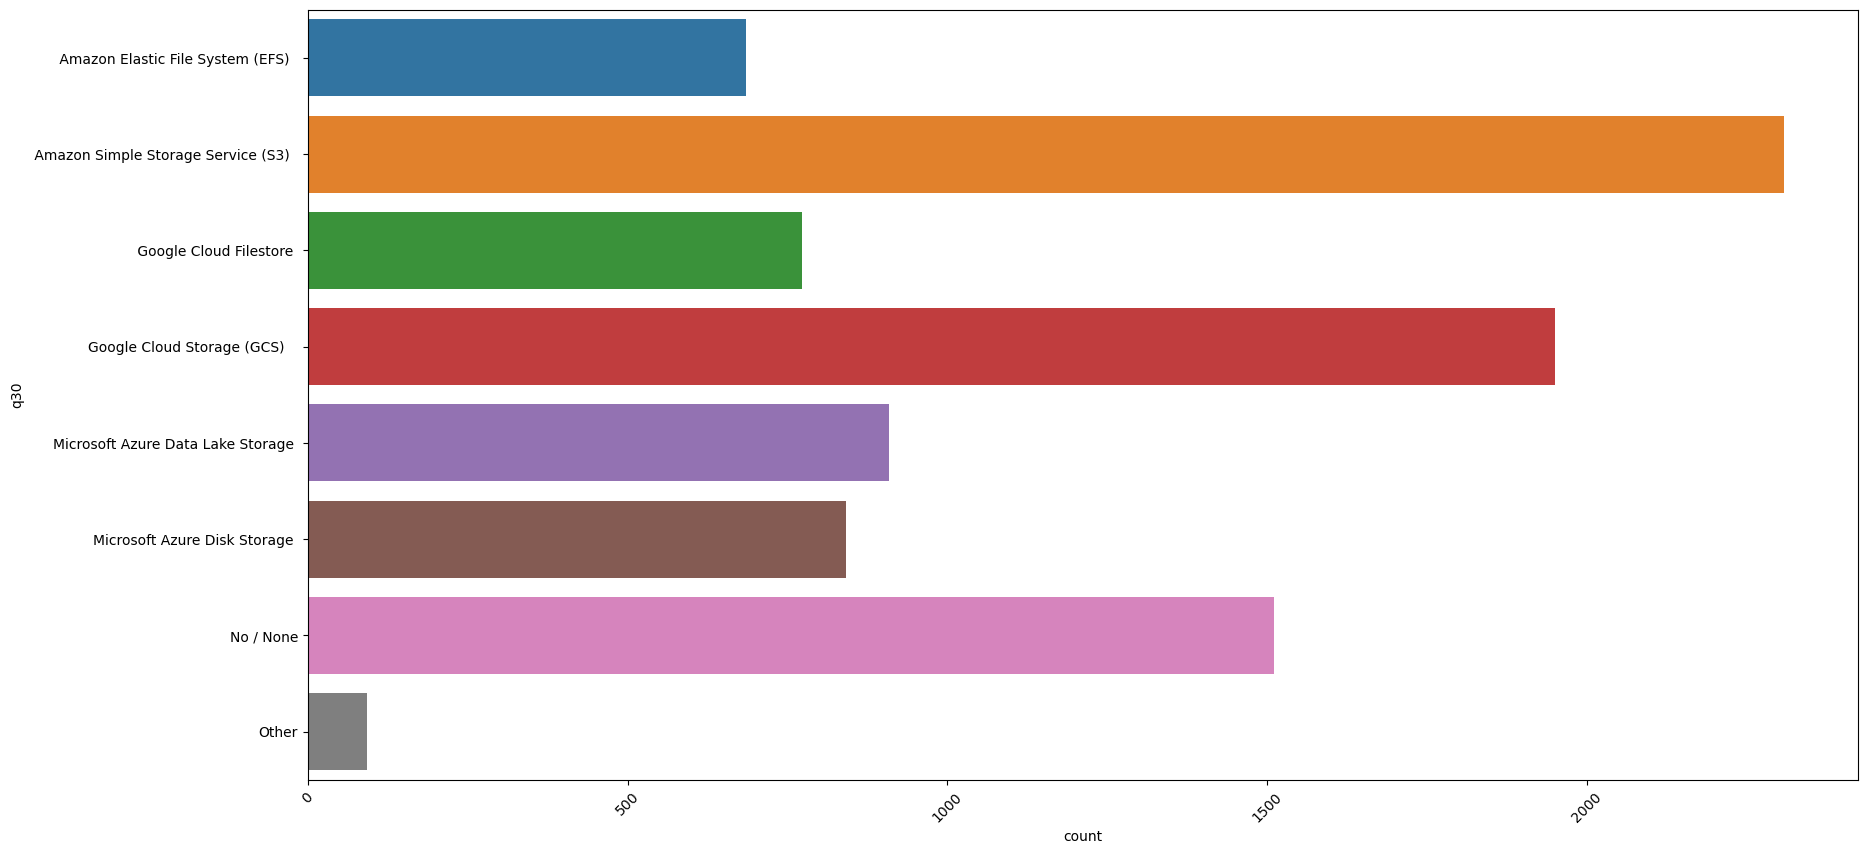

In [99]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.xticks(rotation = 45);

# Q31

In [101]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,0,"No / None,"
1,1,NaN
2,2,"DataRobot,"
3,3,NaN
4,4,"Azure Machine Learning Studio ,"
...,...,...
25968,25968,"Amazon SageMaker , Databricks,"
25969,25969,NaN
25970,25970,NaN
25971,25971,NaN


In [102]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,0,"[No / None, ]"
1,1,None
2,2,"[ DataRobot, ]"
3,3,None
4,4,"[ Azure Machine Learning Studio , ]"
...,...,...
25968,25968,"[ Amazon SageMaker , Databricks, ]"
25969,25969,None
25970,25970,None
25971,25971,None


In [103]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,No / None
1,0,
2,1,None
3,2,DataRobot
4,2,
...,...,...
36906,25968,
36907,25969,None
36908,25970,None
36909,25971,None


In [111]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                   9297
 Alteryx                            254
 Amazon SageMaker                   991
 Azure Machine Learning Studio      945
 DataRobot                          332
 Databricks                         825
 Dataiku                            203
 Google Cloud Vertex AI             714
 Rapidminer                         293
No / None                          6381
Other                               275
dtype: int64

In [112]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Alteryx,254
2,Amazon SageMaker,991
3,Azure Machine Learning Studio,945
4,DataRobot,332
5,Databricks,825
6,Dataiku,203
7,Google Cloud Vertex AI,714
8,Rapidminer,293
9,No / None,6381
10,Other,275


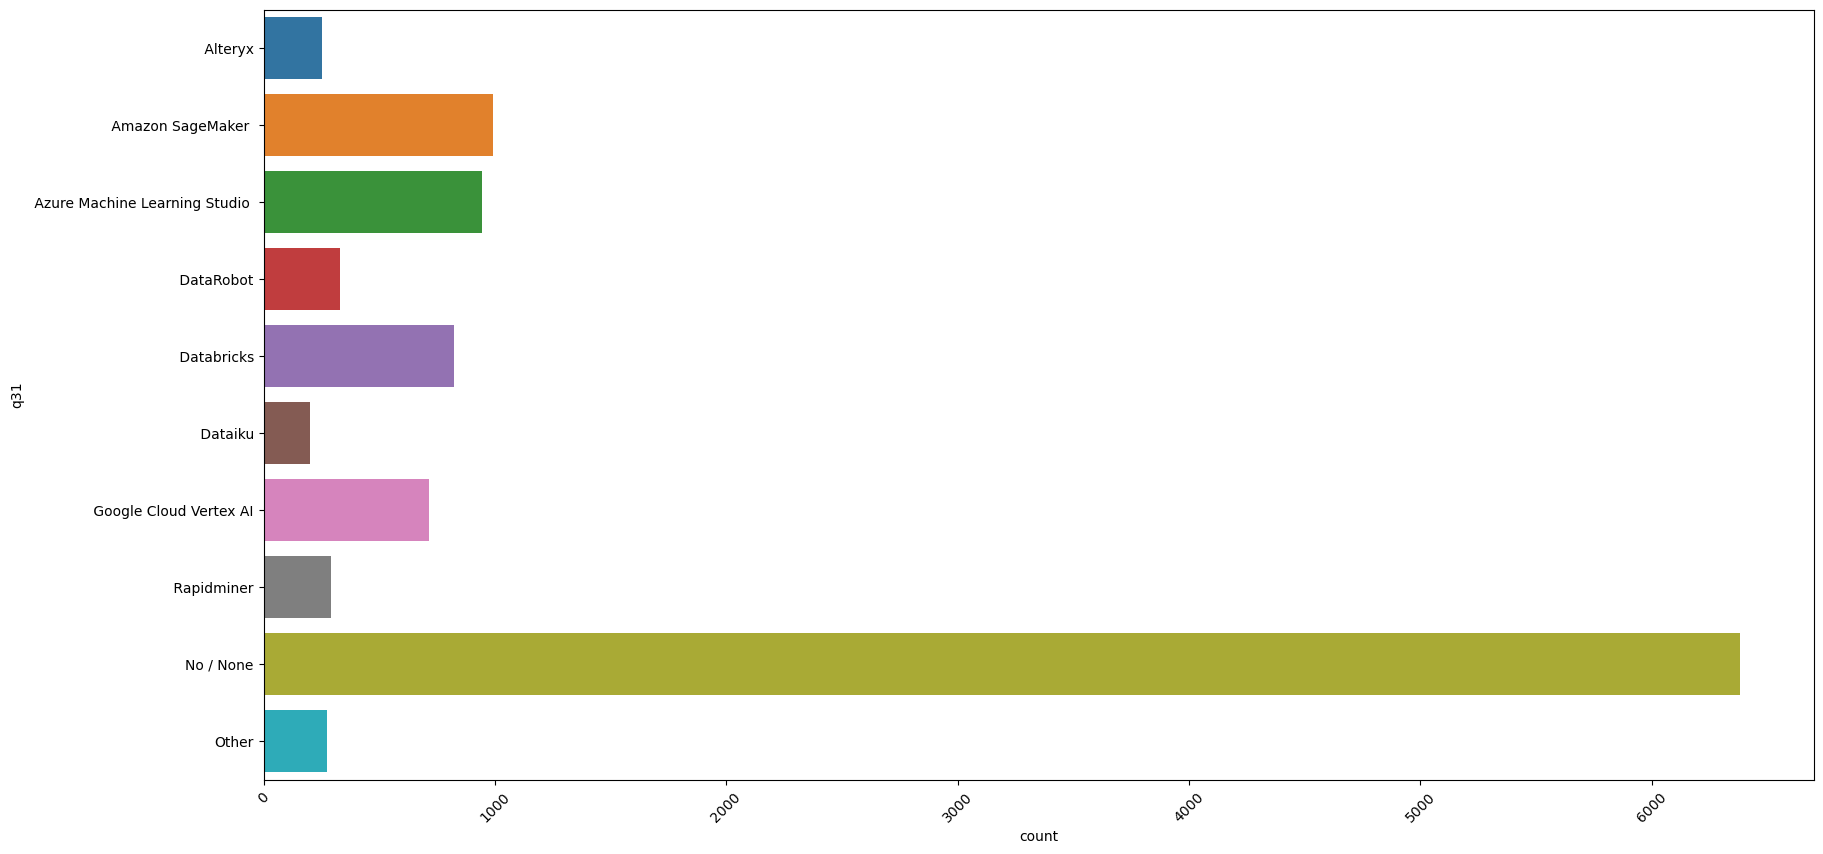

In [113]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.xticks(rotation = 45);

# Q32

In [115]:
df.columns

Index(['index', 'q3', 'q5', 'q6', 'q8', 'q11', 'q13', 'q15', 'q23', 'q33',
       'q41', 'q7', 'q9', 'q12', 'q14', 'q16', 'q17', 'q24', 'q28', 'q10',
       'q18', 'q19', 'q27', 'q29', 'q30', 'q31', 'q36', 'q37', 'q38', 'q39',
       'q40', 'q42'],
      dtype='object')